In [1]:
import numpy as np
import matplotlib.pyplot as plt

implementation

In [2]:
def getValueFunction(state_values,i,ph,gamma):
    value_estimates = []
    for a in range(i+1):
        Q = ph*(1+gamma*state_values[i+a])+(1-ph)*(0+gamma*state_values[i-a])
        value_estimates.append(Q)
    return max(value_estimates)


In [3]:
def valueIterationGambling(ph,gamma, win_money, epoch):
    state_values = np.array([0]*(win_money*2+1))
    state_values[0] = -100
    state_values[100:] = 100
    state_values = list(state_values)
    for k in range(epoch):
        new_state_values = state_values.copy()
        for i in range(1,100):
            new_state_values[i] = getValueFunction(state_values,i, ph, gamma)
        state_values = new_state_values.copy()
    return state_values

In [4]:
def getOptimalPolicy(state_values, ph,gamma):
    optimalAction = []
    for i in range(1,100):
        all_Qs = []
        for a in range(1,i+1):
            Q = ph*(1+gamma*state_values[i+a])+(1-ph)*(0+gamma*state_values[i-a])
            all_Qs.append(Q)
        optimalAction.append(np.array(all_Qs).argmax()+1)
    return optimalAction
                


running

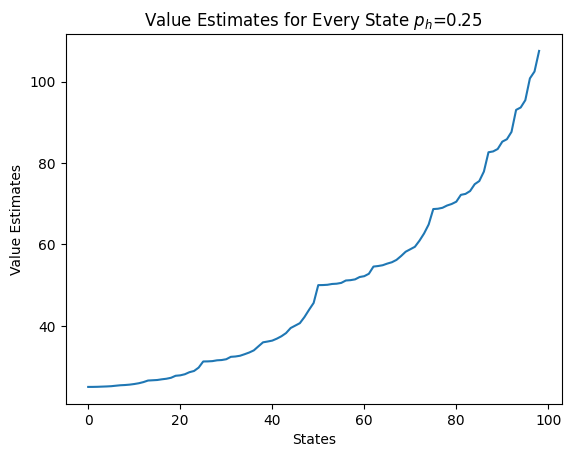

In [5]:
state_values25 = valueIterationGambling(ph=0.25,gamma=1, win_money=100, epoch=100)


plt.plot(state_values25[1:100])
plt.xlabel("States")
plt.ylabel("Value Estimates")
plt.title("Value Estimates for Every State $p_h$=0.25");

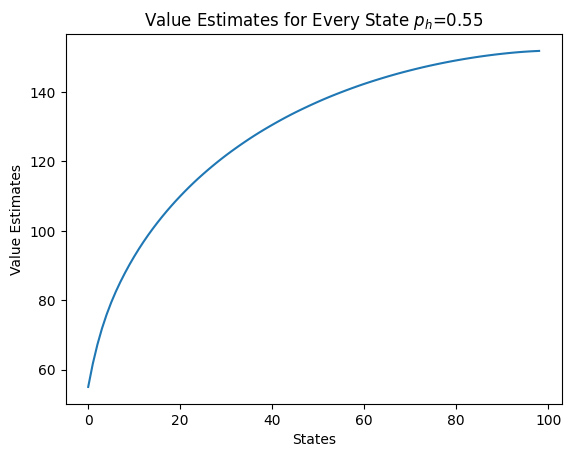

In [6]:
state_values55 = valueIterationGambling(ph=0.55,gamma=1, win_money=100, epoch=100)

plt.plot(state_values55[1:100])
plt.xlabel("States")
plt.ylabel("Value Estimates")
plt.title("Value Estimates for Every State $p_h$=0.55");

In [7]:
OptimalPolicy25 = getOptimalPolicy(state_values= state_values25,ph=0.25,gamma = 1)
OptimalPolicy55 = getOptimalPolicy(state_values= state_values55,ph=0.55,gamma = 1)

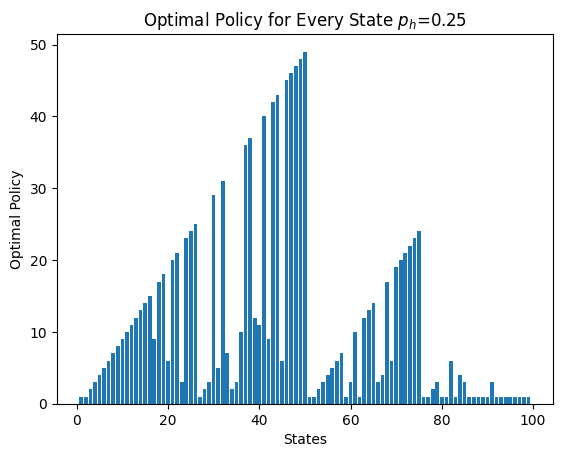

In [8]:

plt.bar(np.arange(1,100), OptimalPolicy25)
plt.xlabel("States")
plt.ylabel("Optimal Policy")
plt.title("Optimal Policy for Every State $p_h$=0.25");

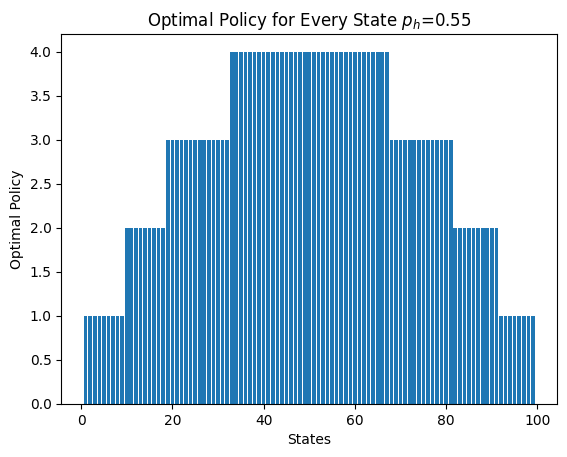

In [9]:
plt.bar(np.arange(1,100), OptimalPolicy55)
plt.xlabel("States")
plt.ylabel("Optimal Policy")
plt.title("Optimal Policy for Every State $p_h$=0.55");